In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from neurovis import NeuroVis

# Reproduce a figure from a published article with a public dataset

## This article:
#### Nuo Li, Tsai-Wen Chen, Zengcai V. Guo, Charles R. Gerfen & Karel Svoboda.   A motor cortex circuit for motor planning and movement.  Nature 519, 51–56 (05 March 2015) PMID: 25731172 doi: 10.1038/nature14178 [[link to paper](http://www.nature.com/nature/journal/v519/n7541/full/nature14178.html)]

## Has a publicly available dataset on CRCNS.org:
#### Nuo Li, Charles R Gerfen, Karel Svoboda (2014); Extracellular recordings from anterior lateral motor cortex (ALM) neurons of adult mice performing a tactile decision behavior. CRCNS.org [[link to dataset](https://crcns.org/data-sets/motor-cortex/alm-1)]


## Here's Figure 2:

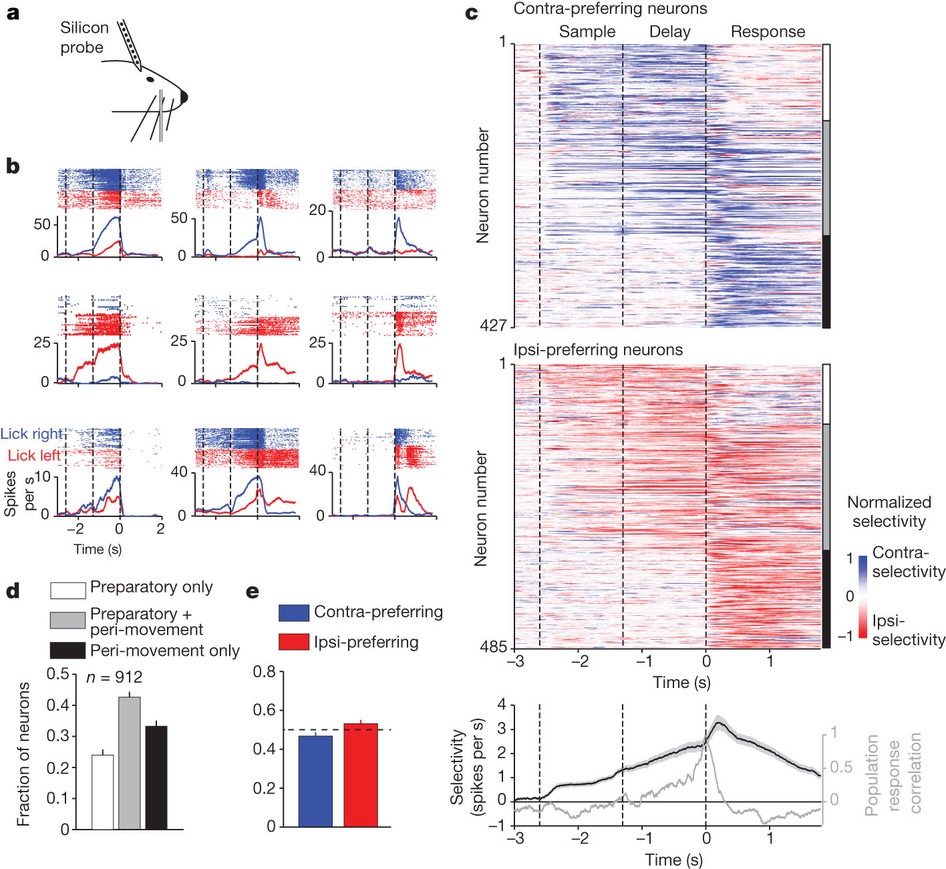

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename="./figures/nature14178-f2.jpg", width=650)

# Let's reproduce the first panel of Figure 2b

#### We will need the data for neuron `9` of session `ANM218457_20131006`

## 0. Download data

#### 0.1. Register in `CRCNS` [[link to request account](https://crcns.org/request-account)]
#### 0.2. Download file `data_structure_ANM218457.tar.gz` [[link](https://portal.nersc.gov/project/crcns/download/alm-1/datafiles/data_structure_files)]
#### 0.3. Unzip it and you will find file `data_structure_ANM218457_20131006.mat`

## 1. Load data

In [4]:
import scipy.io
mat = scipy.io.loadmat('data_structure_ANM218457/data_structure_ANM218457_20131006')

## 2. Get spike times

In [5]:
neuron_n = 9
spike_times = mat['obj']['eventSeriesHash'][0][0]['value'][0][0][0][neuron_n-1][0][0][1]
spike_times = [i[0] for i in spike_times]

# instantiate neuron
neuron = NeuroVis(spike_times, neuron_n)
print 'neuron %d has a firing rate of %0.2f spikes per second' % (neuron_n, neuron.firingrate)

neuron 9 has a firing rate of 5.07 spikes per second


## 3. Get event times

In [6]:
events = dict()
trialStart = mat['obj']['trialStartTimes'][0][0][0]
cueTimes = mat['obj']['trialPropertiesHash'][0][0][0][0][2][0][2]
cueTimes = np.array([i[0] for i in cueTimes])

events['RealCueTimes'] = trialStart+cueTimes

## 4. Get features

In [7]:
#get features
features = dict()

#get Lick Right (HitR) and Lick Reft (HitL)
trialTypeMat = mat['obj']['trialTypeMat'][0][0]
trialTypeStr = mat['obj']['trialTypeStr'][0][0]
trialTypeStr = np.array([i[0][0] for i in trialTypeStr])
for ind, feat in enumerate(trialTypeStr):
    features[str(feat)] = trialTypeMat[ind]
    
#get Good Trials
goodTrials = mat['obj']['trialPropertiesHash'][0][0][0][0][2][0][3]
features['GoodTrials'] = np.array([i[0] for i in goodTrials])

print 'now we have these features:'
print features.keys()

now we have these features:
['HitR', 'ErrL', 'NoLickL', 'LickEarly', 'NoLickR', 'GoodTrials', 'ErrR', 'StimTrials', 'HitL']


## 5. Define conditions on features

In [8]:
conditions = dict()

conditions[0] = dict()
conditions[0]['HitR'] = [1]
conditions[0]['GoodTrials'] = [1]
                   
conditions[1] = dict()
conditions[1]['HitL'] = [1]
conditions[1]['GoodTrials'] = [1]

condition_names = ['Lick right','Lick left']

 ## 6. Plot PSTH and Raster plots

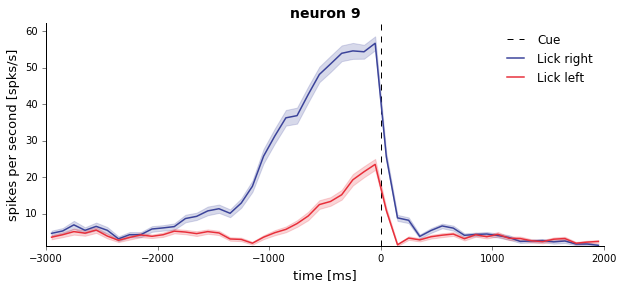

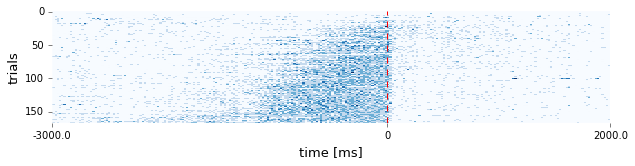

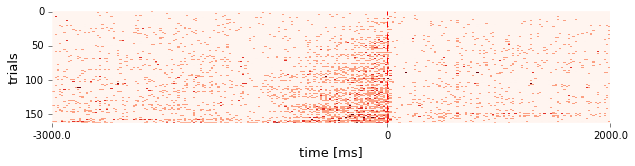

In [9]:
window = [-3000,2000]

psth_fig2b1 = neuron.get_psth(events=events['RealCueTimes'],
                             features=features,
                             conditions=conditions,
                             window=window,
                             binsize=100,
                             plot=False);

neuron.plot_psth(psth_fig2b1,
                 condition_names=condition_names,
                 colors=['#3B439A', '#E82F3A'],
                 figsize=(10, 4), 
                 event_name='Cue')

rasters_fig2b1 = neuron.get_raster(events['RealCueTimes'],
                            features=features,
                            conditions=conditions, 
                            window=window,
                            binsize=20,
                            plot=False);

neuron.plot_raster(rasters=rasters_fig2b1,
                   cmap = [plt.get_cmap('Blues'), plt.get_cmap('Reds')],
                   condition_names=condition_names,
                   figsize=(10,2),
                   sort=True,
                   has_title=False)